In [1]:
import wandb
import pandas as pd
from matplotlib import pyplot as plt


In [2]:

entity="miki-light"
project="hallucination-probes"
api = wandb.Api()

runs = api.runs(f"{entity}/{project}")
print(runs.variables)


{'project': 'hallucination-probes', 'entity': 'miki-light', 'order': '+created_at', 'filters': '{}'}


In [3]:

datasets = [
    'llama3_1_8b_trivia_qa_test',
    'llama3_1_8b_longform_test',
    'llama3_1_8b_longform_augmented_test',
    'llama3_1_8b_healthbench_test'
]
ci_suffixes = ['', '_ci_upper', '_ci_lower']

metrics = ['auc']

cols = ['id', 'name' ] + [
    f'train/{dataset}/span_max_{metric}{ci_suffix}' for dataset in datasets for ci_suffix in ci_suffixes for metric in metrics
]
for col in cols:
    print(col)



id
name
train/llama3_1_8b_trivia_qa_test/span_max_auc
train/llama3_1_8b_trivia_qa_test/span_max_auc_ci_upper
train/llama3_1_8b_trivia_qa_test/span_max_auc_ci_lower
train/llama3_1_8b_longform_test/span_max_auc
train/llama3_1_8b_longform_test/span_max_auc_ci_upper
train/llama3_1_8b_longform_test/span_max_auc_ci_lower
train/llama3_1_8b_longform_augmented_test/span_max_auc
train/llama3_1_8b_longform_augmented_test/span_max_auc_ci_upper
train/llama3_1_8b_longform_augmented_test/span_max_auc_ci_lower
train/llama3_1_8b_healthbench_test/span_max_auc
train/llama3_1_8b_healthbench_test/span_max_auc_ci_upper
train/llama3_1_8b_healthbench_test/span_max_auc_ci_lower


In [4]:

# 2. Create the empty DataFrame, using keys from dtypes as columns
runs_df = pd.DataFrame(columns=cols)
for run in runs:
    row = {}
    row['run_id'] = run.id
    row['name'] = run.name
    for col in cols:
        if col == 'id':
            row[col] = run.id
        elif col == 'name':
            row[col] = run.name or run.id  # Fallback to ID if name is None
        else:
            # due to a bug, one run has 'train/val/...' instead of 'train/...'
            row[col] = run.summary.get(col, run.summary.get(col.replace('train/', 'train/val/'), None))
    runs_df = pd.concat([runs_df, pd.DataFrame([row])], ignore_index=True)
runs_df


/tmp/ipykernel_116547/3888076044.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  runs_df = pd.concat([runs_df, pd.DataFrame([row])], ignore_index=True)
/tmp/ipykernel_116547/3888076044.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  runs_df = pd.concat([runs_df, pd.DataFrame([row])], ignore_index=True)
/tmp/ipykernel_116547/3888076044.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclud

,id,name,train/llama3_1_8b_trivia_qa_test/span_max_auc,train/llama3_1_8b_trivia_qa_test/span_max_auc_ci_upper,train/llama3_1_8b_trivia_qa_test/span_max_auc_ci_lower,train/llama3_1_8b_longform_test/span_max_auc,train/llama3_1_8b_longform_test/span_max_auc_ci_upper,train/llama3_1_8b_longform_test/span_max_auc_ci_lower,train/llama3_1_8b_longform_augmented_test/span_max_auc,train/llama3_1_8b_longform_augmented_test/span_max_auc_ci_upper,train/llama3_1_8b_longform_augmented_test/span_max_auc_ci_lower,train/llama3_1_8b_healthbench_test/span_max_auc,train/llama3_1_8b_healthbench_test/span_max_auc_ci_upper,train/llama3_1_8b_healthbench_test/span_max_auc_ci_lower,run_id
0,c9obtel7,clean_code_llama3_1_8b_lora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c9obtel7
1,6f5sdjfv,clean_code_llama3_1_8b_lora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6f5sdjfv
2,4nirly3k,clean_code_llama3_1_8b_lora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4nirly3k
3,27ruoljb,clean_code_llama3_1_8b_lora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27ruoljb
4,eo5upkqa,clean_code_llama3_1_8b_lora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eo5upkqa
5,8o4wuwm4,clean_code_llama3_1_8b_lora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8o4wuwm4
6,6ouke6j7,clean_code_llama3_1_8b_lora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6ouke6j7
7,vhj141ov,clean_code_llama3_1_8b_lora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vhj141ov
8,vvdgkj4d,clean_code_llama3_1_8b_lora,0.890710,NaN,NaN,0.816479,NaN,NaN,0.816761,NaN,NaN,0.808518,NaN,NaN,vvdgkj4d
9,n9a9g5lx,clean_code_llama3_1_8b_lora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n9a9g5lx


In [5]:

runs_df = runs_df.dropna()
runs_df


,id,name,train/llama3_1_8b_trivia_qa_test/span_max_auc,train/llama3_1_8b_trivia_qa_test/span_max_auc_ci_upper,train/llama3_1_8b_trivia_qa_test/span_max_auc_ci_lower,train/llama3_1_8b_longform_test/span_max_auc,train/llama3_1_8b_longform_test/span_max_auc_ci_upper,train/llama3_1_8b_longform_test/span_max_auc_ci_lower,train/llama3_1_8b_longform_augmented_test/span_max_auc,train/llama3_1_8b_longform_augmented_test/span_max_auc_ci_upper,train/llama3_1_8b_longform_augmented_test/span_max_auc_ci_lower,train/llama3_1_8b_healthbench_test/span_max_auc,train/llama3_1_8b_healthbench_test/span_max_auc_ci_upper,train/llama3_1_8b_healthbench_test/span_max_auc_ci_lower,run_id
38,qpt6ln6e,clean_code_llama3_1_8b_lora,0.890710,0.903814,0.876505,0.816479,0.822691,0.809905,0.816761,0.824606,0.809181,0.808518,0.819441,0.798213,qpt6ln6e
39,co9h5d5u,clean_code_llama3_1_8b_lora,0.890710,0.903814,0.876505,0.816479,0.822691,0.809905,0.816761,0.824606,0.809181,0.808518,0.819441,0.798213,co9h5d5u
40,gwkvp0z4,meditron3_8b_lora_probe_r16,0.968650,0.975209,0.961676,0.889498,0.894275,0.885035,0.903492,0.908770,0.898453,0.887741,0.895886,0.880107,gwkvp0z4
41,y4h1pjju,meditron3_8b_lora_probe_r64,0.971162,0.977452,0.964607,0.892129,0.896859,0.887595,0.903843,0.909005,0.898694,0.882873,0.890579,0.875289,y4h1pjju
42,hdpwlovf,clean_code_llama3_1_8b_lora,0.890710,0.903814,0.876505,0.816479,0.822691,0.809905,0.816761,0.824606,0.809181,0.808518,0.819441,0.798213,hdpwlovf
43,w2mn0bdl,clean_code_llama3_1_8b_lora,0.890710,0.903814,0.876505,0.816479,0.822691,0.809905,0.816761,0.824606,0.809181,0.808518,0.819441,0.798213,w2mn0bdl
44,j2ycu8a3,meditron3_8b_lora_probe_r16,0.969099,0.975559,0.962626,0.889548,0.894269,0.884832,0.902401,0.907752,0.897398,0.883214,0.891215,0.875194,j2ycu8a3
45,ww2c1x2v,meditron3_8b_lora_probe_r64,0.970225,0.976600,0.963680,0.891105,0.895739,0.886528,0.904562,0.909910,0.899542,0.885454,0.893429,0.877905,ww2c1x2v
46,qszzfsx1,meditron3_8b_lora_probe_r16,0.967366,0.974026,0.959970,0.890340,0.895044,0.885700,0.902021,0.907518,0.896881,0.882193,0.890115,0.874341,qszzfsx1
47,eicoi6wi,meditron3_8b_lora_probe_r64,0.967635,0.974400,0.960157,0.891279,0.895774,0.886899,0.904197,0.909318,0.899017,0.882477,0.890674,0.874795,eicoi6wi


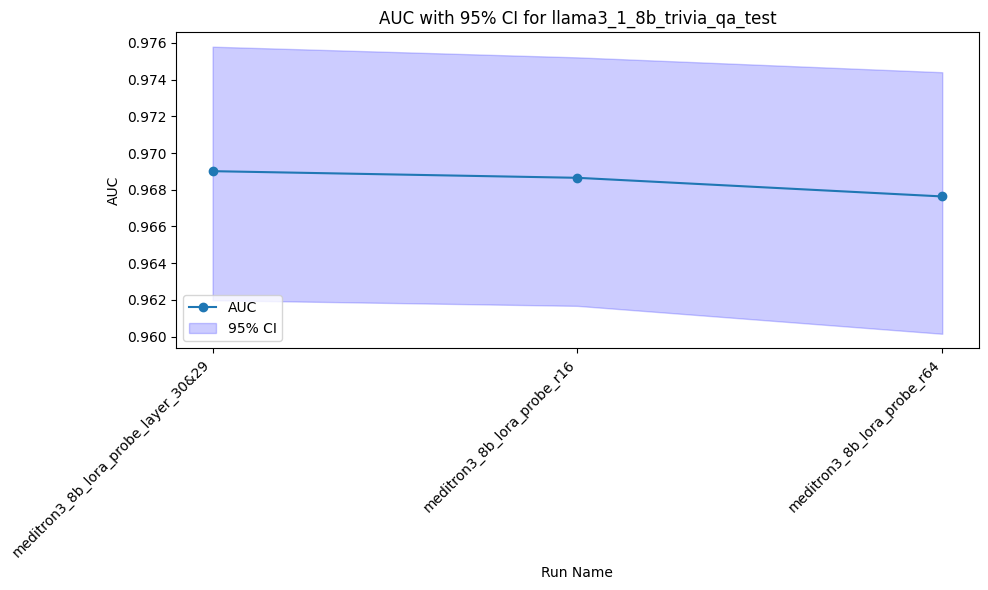

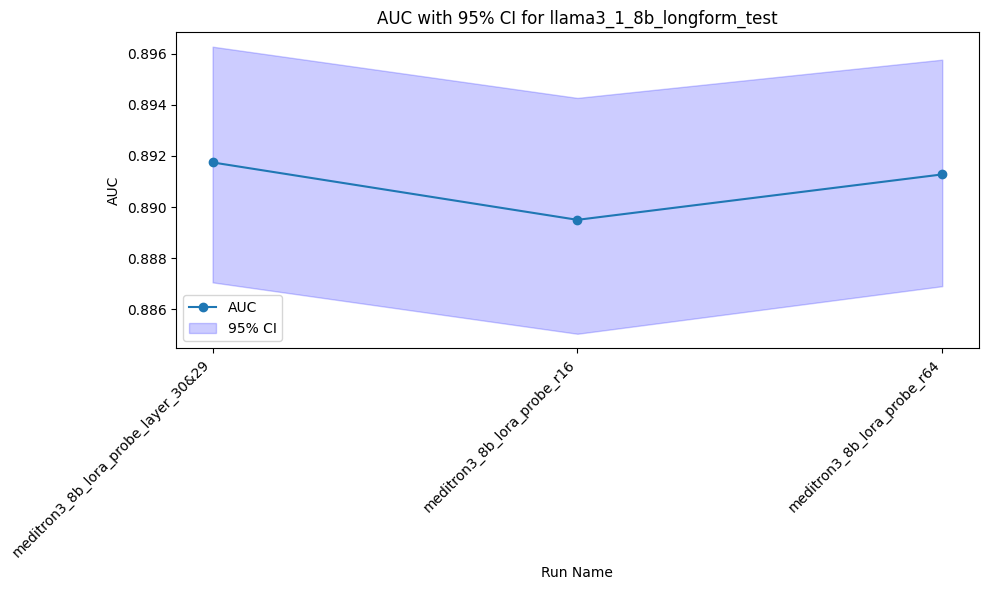

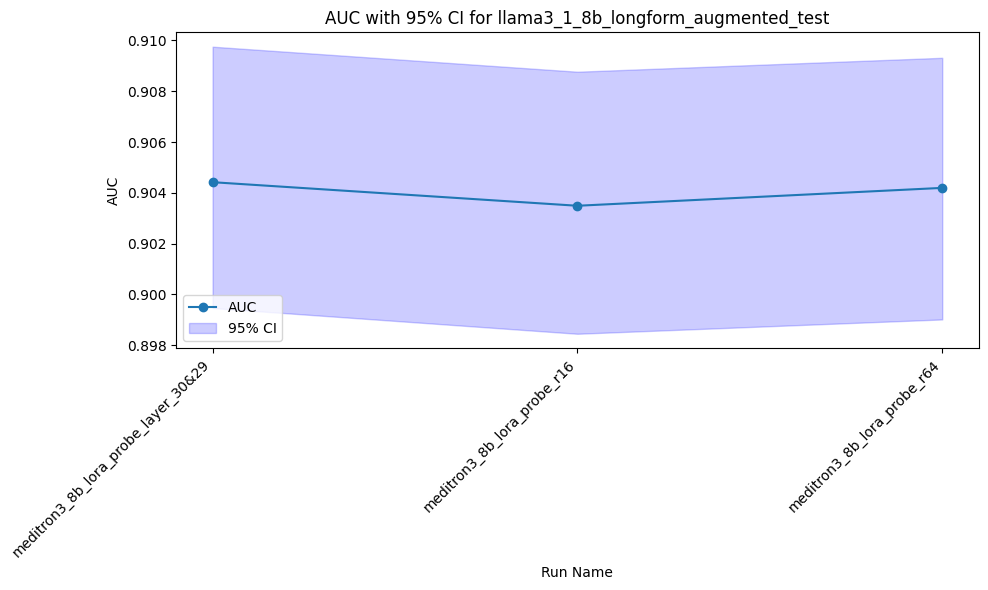

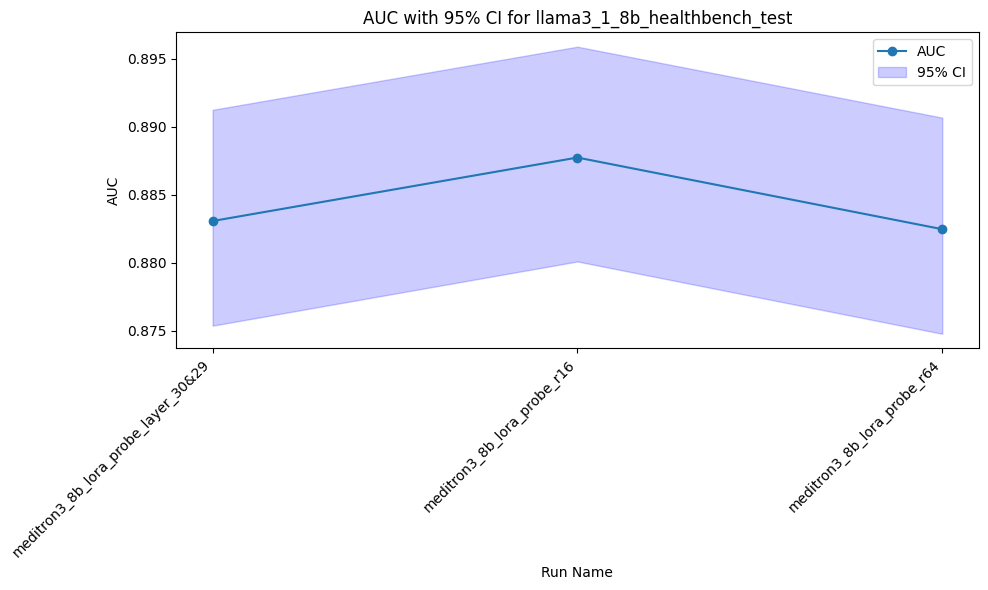

In [8]:
search_strs = ["meditron3_8b_lora_probe_r16", "meditron3_8b_lora_probe_r64", "layer"]
pattern = "|".join(search_strs)   

filtered_df = runs_df[runs_df['name'].str.contains(pattern, regex=True)]
# sort by name
filtered_df = filtered_df.sort_values(by='name')
filtered_df = filtered_df.iloc[[0, 1, 7]]
# Plot with CI
for dataset in datasets:
    plt.figure(figsize=(10, 6))
    
    # Create numeric x-axis positions
    x_pos = range(len(filtered_df))
    
    plt.plot(
        x_pos,
        filtered_df[f'train/{dataset}/span_max_auc'],
        label='AUC',
        marker='o'
    )
    plt.fill_between(
        x_pos,
        filtered_df[f'train/{dataset}/span_max_auc_ci_lower'],
        filtered_df[f'train/{dataset}/span_max_auc_ci_upper'],
        color='b',
        alpha=0.2,
        label='95% CI'
    )
    plt.title(f'AUC with 95% CI for {dataset}')
    plt.xlabel('Run Name')
    plt.ylabel('AUC')
    plt.xticks(x_pos, filtered_df['name'], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()